In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

## Étape 1
### 1- Lecture des données

In [2]:
df = pd.read_csv("../cours5/Donnees_Temperat_France.csv", header=0, index_col=0, encoding="latin_1", sep = ';')
display(df.head(50))
print(df.info())

,Janv,Févr,Mars,Avri,Mai,Juin,juil,Août,Sept,Octo,Nove,Déce,Lati,Long,Moye,Ampl,Région
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.38,3.04,9.73,14.7,NE
Lyon,2.1,3.3,7.7,10.9,14.9,18.5,20.7,20.1,16.9,11.4,6.7,3.1,45.45,4.51,11.36,18.6,SE
Marseille,5.5,6.6,10.0,13.0,16.8,20.8,23.3,22.8,19.9,15.0,10.2,6.9,43.18,5.24,14.23,17.8,SE
Montpellier,5.6,6.7,9.9,12.8,16.2,20.1,22.7,22.3,19.3,14.6,10.0,6.5,43.36,3.53,13.89,17.1,SE
Nantes,5.0,5.3,8.4,10.8,13.9,17.2,18.8,18.6,16.4,12.2,8.2,5.5,47.13,-1.33,11.69,13.8,NO
Nice,7.5,8.5,10.8,13.3,16.7,20.1,22.7,22.5,20.3,16.0,11.5,8.2,43.42,7.15,14.84,15.2,SE


<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, Bordeaux to Vichy
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Janv    15 non-null     float64
 1   Févr    15 non-null     float64
 2   Mars    15 non-null     float64
 3   Avri    15 non-null     float64
 4   Mai     15 non-null     float64
 5   Juin    15 non-null     float64
 6   juil    15 non-null     float64
 7   Août    15 non-null     float64
 8   Sept    15 non-null     float64
 9   Octo    15 non-null     float64
 10  Nove    15 non-null     float64
 11  Déce    15 non-null     float64
 12  Lati    15 non-null     float64
 13  Long    15 non-null     float64
 14  Moye    15 non-null     float64
 15  Ampl    15 non-null     float64
 16  Région  15 non-null     object 
dtypes: float64(16), object(1)
memory usage: 2.1+ KB
None


_Nous n'utiliserons pas la variable `Région` puisqu'elle ne contient pas des valeurs numériques, ce qui est requis pour l'ACP. Du reste, toutes les autres variables sont du type quantitative continues._

In [3]:
df.drop("Région", axis=1, inplace=True)
print(df.columns)

Index(['Janv', 'Févr', 'Mars', 'Avri', 'Mai', 'Juin', 'juil', 'Août', 'Sept',
       'Octo', 'Nove', 'Déce', 'Lati', 'Long', 'Moye', 'Ampl'],
      dtype='object')


### 2- Standardisation des données en vue d’une analyse ACP

In [4]:
scaler = preprocessing.StandardScaler()
standardized = scaler.fit_transform(df)
print(standardized.round(4))

[[ 0.8388  0.9787  1.399   1.3315  0.9402  0.8465  0.5186  0.7374  0.9036
   0.8371  0.6733  0.7153 -0.6943 -0.9119  0.9806 -0.2284]
 [ 1.0967  0.5355 -0.2933 -1.3023 -1.9492 -1.9815 -2.0583 -1.8349 -1.2807
  -0.181   0.6159  1.1381  0.9926 -2.1441 -0.6738 -2.5419]
 [-0.7082 -0.6279 -0.4964 -0.4975 -0.4357 -0.3078 -0.2107 -0.2401 -0.4406
  -0.6335 -0.7613 -0.6589 -0.2568  0.1456 -0.564   0.3945]
 [-1.2754 -0.9049 -0.361  -0.278   0.0459 -0.0192  0.1297 -0.0343 -0.1606
  -0.5204 -0.8187 -1.346  -0.4237  0.888  -0.5381  1.1953]
 [-0.8113 -1.0711 -1.5118 -1.5218 -1.3988 -1.4621 -1.329  -1.269  -1.2807
  -1.086  -1.0482 -0.7118  1.9579  0.1425 -1.3459 -0.5398]
 [-0.966  -0.8495 -0.361  -0.0585  0.321   0.3848  0.4214  0.2744 -0.0485
  -0.5204 -0.7039 -0.9232 -0.2658  0.601  -0.2925  1.1953]
 [ 0.7873  0.9787  1.1959  1.4779  1.6282  1.7122  1.6855  1.6634  1.6317
   1.5159  1.3046  1.0852 -1.2897  0.8288  1.5622  0.8394]
 [ 0.8388  1.0341  1.1282  1.3315  1.2154  1.3082  1.3938  1.4062  1.

### 3- Vérification que les données sont centrées et réduites

In [5]:
print("Les moyennes des variables:\n", np.mean(standardized, axis = 0).round(3))
print("Les écarts types des variables\n", np.std(standardized, axis=0))

Les moyennes des variables:
 [ 0.  0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0. -0. -0.  0.]
Les écarts types des variables
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Étape 2
### 1- Calcul de la matrice de corrélation des variables

In [6]:
corr_matrix = np.corrcoef(standardized.T)
display(corr_matrix.round(3))

array([[ 1.   ,  0.973,  0.835,  0.611,  0.363,  0.339,  0.297,  0.405,
         0.604,  0.85 ,  0.951,  0.994, -0.424, -0.388,  0.775, -0.566],
       [ 0.973,  1.   ,  0.931,  0.761,  0.547,  0.524,  0.49 ,  0.588,
         0.76 ,  0.94 ,  0.986,  0.97 , -0.595, -0.222,  0.89 , -0.377],
       [ 0.835,  0.931,  1.   ,  0.92 ,  0.767,  0.757,  0.722,  0.798,
         0.911,  0.968,  0.927,  0.834, -0.806, -0.041,  0.97 , -0.062],
       [ 0.611,  0.761,  0.92 ,  1.   ,  0.953,  0.942,  0.912,  0.949,
         0.978,  0.905,  0.782,  0.619, -0.853,  0.291,  0.964,  0.284],
       [ 0.363,  0.547,  0.767,  0.953,  1.   ,  0.994,  0.981,  0.98 ,
         0.942,  0.77 ,  0.591,  0.381, -0.837,  0.541,  0.862,  0.547],
       [ 0.339,  0.524,  0.757,  0.942,  0.994,  1.   ,  0.992,  0.989,
         0.94 ,  0.757,  0.572,  0.361, -0.867,  0.527,  0.853,  0.576],
       [ 0.297,  0.49 ,  0.722,  0.912,  0.981,  0.992,  1.   ,  0.991,
         0.933,  0.739,  0.547,  0.324, -0.878,  0.588,  0

### 2-3-4 Calcul de valeurs propres de la matrice de corrélation, somme des valeurs propres et calcul de la proportion de variance expliquée

In [94]:
eigen_values, eigen_vectors = np.linalg.eig(corr_matrix)
print("Eigenvectors: \n",eigen_vectors.round(3),"\n")
print("Eigenvalues: \n", eigen_values, "\n")

sum_eigen_values = sum(eigen_values)
print("Somme des valeurs propres:", sum_eigen_values, "\n")
props = list(map(lambda ev: ev / sum_eigen_values, eigen_values))
print("Proportion de variance expliquée:\n" + str(props))

Eigenvectors: 
 [[-0.212 -0.345  0.135 -0.015 -0.036  0.227  0.297  0.073  0.235 -0.112
   0.35  -0.185 -0.181 -0.375  0.304 -0.081]
 [-0.251 -0.261  0.093  0.042  0.233 -0.032  0.226  0.494 -0.15   0.287
  -0.565  0.041  0.234 -0.149 -0.034 -0.069]
 [-0.284 -0.117 -0.208 -0.06   0.476 -0.28  -0.217  0.145 -0.475 -0.251
   0.371 -0.104 -0.11  -0.082 -0.173 -0.12 ]
 [-0.29   0.062 -0.06  -0.36   0.335  0.216 -0.041 -0.252  0.168  0.605
   0.049  0.072 -0.333  0.171 -0.107 -0.105]
 [-0.266  0.205  0.041 -0.36   0.169  0.271 -0.133 -0.069  0.02  -0.355
  -0.132 -0.129  0.481  0.328  0.298  0.065]
 [-0.265  0.215 -0.075 -0.273 -0.191  0.287  0.071 -0.083 -0.007 -0.265
  -0.098  0.304  0.037 -0.54  -0.427 -0.195]
 [-0.26   0.238 -0.019 -0.046 -0.317 -0.03   0.201  0.552  0.012 -0.101
   0.171  0.295 -0.288  0.457 -0.04  -0.088]
 [-0.275  0.185 -0.043 -0.027 -0.249 -0.331  0.336 -0.099  0.022  0.316
   0.329 -0.338  0.484 -0.013 -0.178 -0.083]
 [-0.293  0.073  0.001  0.047  0.01  -0.466  0.1

### 5- Détermination du nombre d’axes à retenir en utilisant le critère de coude

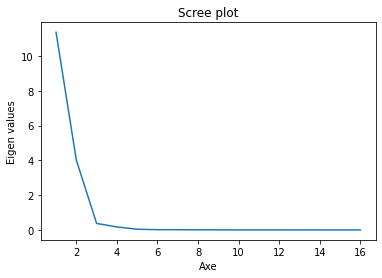

In [8]:
plt.plot(np.arange(1,len(df.columns) + 1),eigen_values)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Axe")
plt.show()

_On voit qu'à partir de 3 composantes principales, il n'y a plus vraiment de gain dans l'explication de la variance; le coude se situe à 3 axes._

### 6- Réalisation d'une  ACP

In [9]:
acp = PCA(svd_solver='full')
C = acp.fit_transform(standardized)
n_component = acp.n_components_

print("Coordonées des individus dans l'espace factoriel:", C.round(3), "\n")
print("Nombre de composantes principales:", n_component, "\n")
print("Variance expliquée:", acp.explained_variance_, "\n")
print("Part de la variance expliquée:", acp.explained_variance_ratio_)

Coordonées des individus dans l'espace factoriel: [[ 3.250e+00  8.630e-01 -8.350e-01  6.970e-01 -3.250e-01  5.500e-02
   1.400e-02 -1.020e-01  2.700e-02  3.700e-02  1.100e-02  9.000e-03
   7.000e-03  1.000e-03  0.000e+00]
 [-2.920e+00  5.057e+00  2.100e-02 -5.420e-01  2.200e-02 -1.380e-01
   1.760e-01 -6.100e-02  3.000e-03  1.700e-02 -2.000e-03  1.000e-02
  -1.000e-03  0.000e+00  0.000e+00]
 [-1.634e+00 -9.280e-01 -4.340e-01 -4.320e-01 -5.300e-02 -5.700e-02
  -1.430e-01 -2.400e-02  9.500e-02  5.000e-02 -2.300e-02 -2.900e-02
  -2.000e-03 -4.000e-03  0.000e+00]
 [-1.282e+00 -2.449e+00 -3.500e-01 -4.290e-01 -3.450e-01  1.270e-01
   2.240e-01  7.300e-02 -2.500e-02 -1.200e-02  1.400e-02 -1.400e-02
  -3.000e-03 -1.000e-03  0.000e+00]
 [-4.799e+00  3.980e-01  9.700e-01  1.050e-01  1.490e-01  3.110e-01
  -1.400e-02 -6.400e-02 -7.000e-03  2.100e-02 -9.000e-03  1.000e-03
   3.000e-03 -1.000e-03  0.000e+00]
 [-6.310e-01 -2.300e+00 -3.850e-01  5.200e-02  9.300e-02 -3.400e-02
   5.200e-02  2.300e-0

_Les eigen values ne sont pas exactement les mêmes, mais restent proches. On remarque aussi qu'il n'y a que 15 composantes principales. Si l'on compare avec les eigenvalues, on remaque que la dernière valeur est négative! Ça doit être la raison pour laquelle elle n'est pas incluse dans l'ACP._

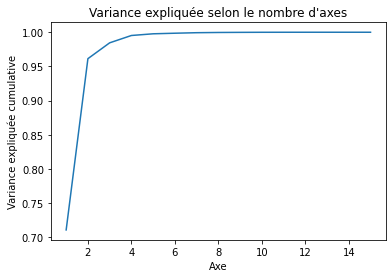

In [10]:
plt.plot(np.arange(1,len(df.columns)),np.cumsum(acp.explained_variance_ratio_))
plt.title("Variance expliquée selon le nombre d'axes")
plt.ylabel("Variance expliquée cumulative")
plt.xlabel("Axe")
plt.show()

### 7- Projection des individus sur les trois premiers axes factoriels

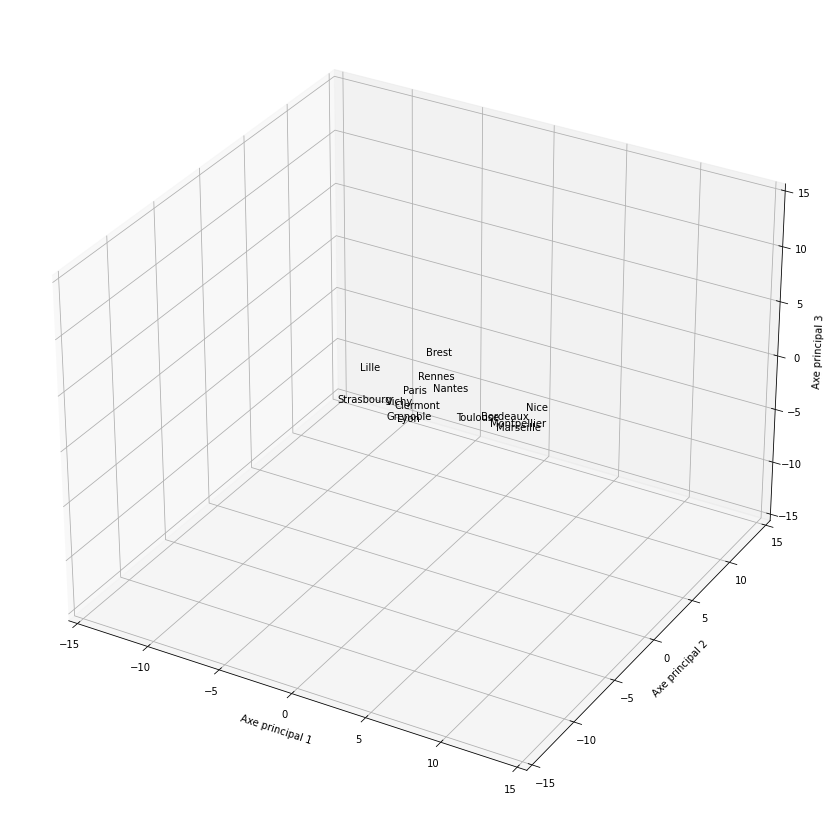

In [73]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')

for r, i in zip(C, df.index):
    label = i
    ax.text(r[0], r[1], r[2], label)

# Tweaking display region and labels
ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)
ax.set_zlim(-15, 15)
ax.set_xlabel('Axe principal 1')
ax.set_ylabel('Axe principal 2')
ax.set_zlabel('Axe principal 3')

plt.show()

_Pour avoir une meilleure vue, nous allons zoomer. Pour ne pas qu'il y ait de distorsion, nous allons utiliser la même échelle partout, c'est-à-dire la valeur absolue la plus grande parmi les 3 premiers axes comme limite._

In [16]:
for i in range(3):
    v = list(map( lambda r: r[i],C))
    print(min(v), max(v))

-4.798566659352197 6.438984017583438
-3.1910033297677103 5.057037907763605
-0.8384126508230826 1.4160225189792426


_On va donc utiliser 7 comme borne._

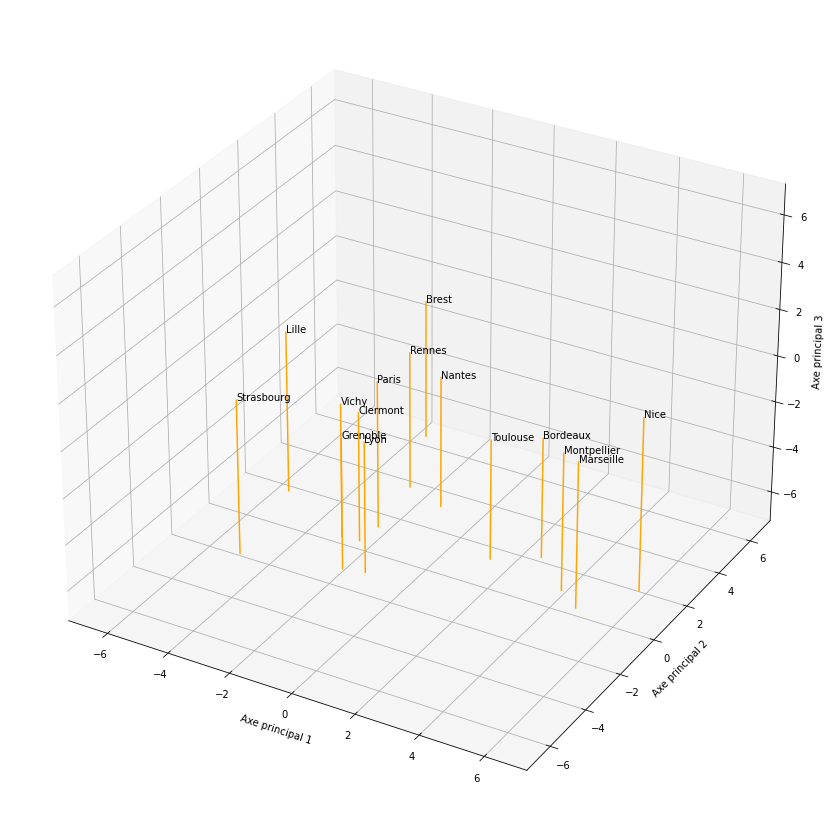

In [70]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')

for r, i in zip(C, df.index):
    ax.text(r[0], r[1], r[2],  i)
    ax.plot3D([r[0],r[0]], [r[1],r[1]], [r[2],-6], c='orange')

ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)
ax.set_xlabel('Axe principal 1')
ax.set_ylabel('Axe principal 2')
ax.set_zlabel('Axe principal 3')

plt.show()

_On peut d'abord observer que la variation selon le $3^e$ axe (la longueur des bâtons) est assez négligeable. Donc, pour faire une analyse plus intéressante, nous allons seulement nous concentrer sur les deux premiers axes._

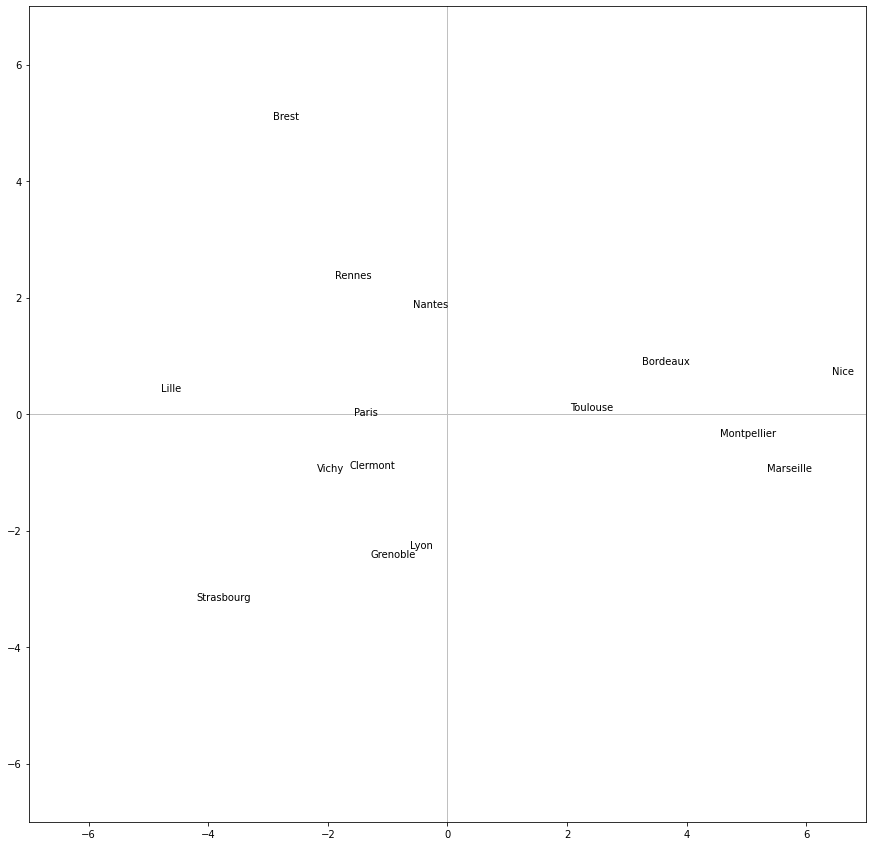

In [72]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(15, 15))
axes.set_xlim(-7,7) #même limites en abscisse
axes.set_ylim(-7,7) #et en ordonnée

#placement des étiquettes des observations
for i in range((df.shape[0])):
 # i correspond à la ligne, 0 à la cp1 et 1 à la cp2
 plt.annotate(df.index[i],(C[i,0],C[i,1]))

#ajouter les axes
plt.plot([-7,7],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-7,7],color='silver',linestyle='-',linewidth=1)

plt.show()

_L'ACP nous permet de réduire la dimensionalité et ainsi pouvoir visualier le regroupement des individus. C'est-à-dire qu'on analyse la typologie des individus._

_Ainsi, sur le graphique ci-haut, on peut voir que les les individus sont plutôt dispersés. Par contre, on peut remarquer que `Lyon` et `Grenoble` sont très proches sur les deux premiers axes, tout comme `Vichy` et `Clermont`. D'autres villes sont pratiquement identiques selon un certain axe, mais plutôt éloignées selon l'autre, comme c'est le cas pour `Lille` et `Toulouse`, ou `Brest` et `Strasbourg` dans l'autre sens. On peut dire que `Brest` et `Marseille` sont à peu près les plus dissemblables, puisqu'ils sont éloignés sur les deux axes (selon les deux premières composantes principales)._

_Par contre, on ne sait pas à quoi est dû cette différence._

## Étape 3
### 2- Détermination des deux premiers axes factoriels.

In [74]:
for r in eigen_vectors:
    print(r[:2])

[-0.21230676 -0.34537435]
[-0.2514008  -0.26107396]
[-0.28393393 -0.11742552]
[-0.28980542  0.06194013]
[-0.26638475  0.20450325]
[-0.26468195  0.21518108]
[-0.25953747  0.23812738]
[-0.27452091  0.18464372]
[-0.29267473  0.07342626]
[-0.28709617 -0.11109862]
[-0.25976884 -0.22820248]
[-0.21672392 -0.33268744]
[ 0.25834112 -0.12590298]
[-0.06644839  0.42260051]
[-0.29531007 -0.04323126]
[-0.04983607  0.48908677]


_Le premier axe factoriel $u_1$ est la première colonne et le deuxième axe $u_2$, la deuxième colonne._

### 3- Évaluation de la qualité globale de la représentation

## $I_k = \frac {\lambda 1 + \lambda 2 + ... + \lambda_k} {\sum_{\alpha=1}^p \lambda_a}$

_Ici, la qualité globale de la représentation se mesure en faisant le rapport entre $\lambda_1 + \lambda 2$ et la somme des valeurs propres._

In [76]:
Ik = (eigen_values[0] + eigen_values[1]) / sum_eigen_values
Ik

0.9613063830051912

_Donc, dans la représentation que nous avons, la qualité globale préservée est de 96%._

### 4- Calcul de la contribution de chaque individu à l’inertie totale

## $d^2_i = \sum_{j=1}^K (x_i^j)^2$

In [77]:
di = (list(map(lambda r : sum(r), (standardized**2))))
print(pd.DataFrame({'ID':df.index,'di':di}).sort_values(by="di", ascending=False))

             ID         di
9          Nice  44.172405
1         Brest  34.446409
6     Marseille  29.717668
12   Strasbourg  28.380070
4         Lille  24.259275
7   Montpellier  21.077283
0      Bordeaux  12.614630
11       Rennes   9.065328
3      Grenoble   8.138589
14        Vichy   5.995591
5          Lyon   5.859712
13     Toulouse   5.125778
8        Nantes   4.024229
2      Clermont   3.946312
10        Paris   3.176722


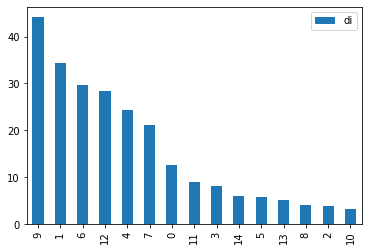

In [78]:
pd.DataFrame({'ID':df.index,'di':di}).sort_values(by="di", ascending=False).plot.bar()
None

_On peut voir que `Nice` et `Brest` sont les deux observations qui contribuent le plus à l'inertie totale._

### 5- Evaluation de la qualité de la représentation de chaque individu sur les deux premiers axes
## $Qlt(i,\alpha) = \cos^2 (i,\alpha) = \frac {(c_i^a)^2} {d^2_i}$

In [84]:
scores_squared = C**2
cos2 = list(map(lambda s, d: s/d, scores_squared, di))

qual_axe_1 = list(map(lambda r: r[0], cos2))
qual_axe_2 = list(map(lambda r: r[1], cos2))

print(pd.DataFrame({'id':df.index,'COS2_1': qual_axe_1,'COS2_2': qual_axe_2}).sort_values(by="COS2_1", ascending=False))
print("\n" + "-"*80 + "\n")
print(pd.DataFrame({'id':df.index,'COS2_1': qual_axe_1,'COS2_2': qual_axe_2}).sort_values(by="COS2_2", ascending=False))

             id    COS2_1    COS2_2
7   Montpellier  0.988524  0.006803
6     Marseille  0.959664  0.032439
4         Lille  0.949173  0.006525
9          Nice  0.938607  0.010715
0      Bordeaux  0.837567  0.059081
13     Toulouse  0.820441  0.000712
14        Vichy  0.789703  0.162936
10        Paris  0.761910  0.000125
2      Clermont  0.676334  0.218363
12   Strasbourg  0.622991  0.358791
11       Rennes  0.388035  0.600053
1         Brest  0.247456  0.742418
3      Grenoble  0.201825  0.736841
8        Nantes  0.080365  0.839872
5          Lyon  0.067910  0.903071

--------------------------------------------------------------------------------

             id    COS2_1    COS2_2
5          Lyon  0.067910  0.903071
8        Nantes  0.080365  0.839872
1         Brest  0.247456  0.742418
3      Grenoble  0.201825  0.736841
11       Rennes  0.388035  0.600053
12   Strasbourg  0.622991  0.358791
2      Clermont  0.676334  0.218363
14        Vichy  0.789703  0.162936
0      Bordeaux  

In [85]:
print("Somme de la qualité premier axe:" + str(sum(qual_axe_1)) + "\nSomme de la qualité deuxième axe:" + str(sum(qual_axe_2)))

Somme de la qualité premier axe:9.330503571545073
Somme de la qualité deuxième axe:4.678745366867993


_Pusiqu'il s'agit du $\cos^2$, les valeurs se situent dans la fourchette [0,1]. Si le $\cos^2$ est près de 1, alors l'individu est bien représenté par l'axe. Ainsi, on peut voir sur les deux tableau que pour le premier axe, certain individus sont très bien représentés alors que d'autres aucunement, comme c'est le cas pour `Lyon`. On peut faire le même exercice pour le deuxième axe. On peut remarquer aussi que ce n'est pas parce qu'un individu est bien représenté sur le premier axe qu'il l'est aussi sur le deuxième. Enfin, on peut voir que la qualité est en générale meilleur sur le premier axe que sur le deuxième. En effet, la somme de la qualité est plus de deux fois supérieure pour le premier axe._

### Bonus - Contribution des individus sur les axes
## $Ctr(i,a) = \frac {(c_\alpha^i)^2} {\lambda _\alpha} = \frac {(\mbox{Score de i sur l'axe }\alpha)^2} {N \lambda_\alpha}$

In [86]:
contrib = list(map(lambda s : s / (df.shape[0] * eigen_values[:-1]), scores_squared))

contrib_axe_1 = list(map(lambda r: r[0], contrib))
contrib_axe_2 = list(map(lambda r: r[1], contrib))

print(pd.DataFrame({'id':df.index,'CTR_1': contrib_axe_1,'CTR_2': contrib_axe_2}).sort_values(by="CTR_1", ascending=False))
print("\n" + "-"*80 + "\n")
print(pd.DataFrame({'id':df.index,'CTR_1': contrib_axe_1,'CTR_2': contrib_axe_2}).sort_values(by="CTR_2", ascending=False))

             id     CTR_1     CTR_2
9          Nice  0.243138  0.007863
6     Marseille  0.167245  0.016016
4         Lille  0.135034  0.002630
7   Montpellier  0.122186  0.002382
12   Strasbourg  0.103684  0.169169
0      Bordeaux  0.061960  0.012382
1         Brest  0.049987  0.424873
14        Vichy  0.027766  0.016230
13     Toulouse  0.024662  0.000061
11       Rennes  0.020629  0.090373
2      Clermont  0.015652  0.014317
10        Paris  0.014194  0.000007
3      Grenoble  0.009633  0.099630
5          Lyon  0.002334  0.087915
8        Nantes  0.001897  0.056152

--------------------------------------------------------------------------------

             id     CTR_1     CTR_2
1         Brest  0.049987  0.424873
12   Strasbourg  0.103684  0.169169
3      Grenoble  0.009633  0.099630
11       Rennes  0.020629  0.090373
5          Lyon  0.002334  0.087915
8        Nantes  0.001897  0.056152
14        Vichy  0.027766  0.016230
6     Marseille  0.167245  0.016016
2      Clermont  

_Sur les deux tableaux précédents, nous avons un classement en fonction de la contribution de chaque individu pour chaque axe. Le premier tableau est classé par rapport au premier axe, et le deuxième par rapport aux deuxième axe. Les individus se trouvant au haut de la liste sont déterminants pour cet axe._

### 6- Représentation du cercle de corrélation des variables
## $r(c,x^j) = \sqrt{\lambda} u_i$

In [97]:
sqrt_eigenvalues = np.sqrt(eigen_values[:-1])
coef_corr_lin = np.array(list(map(lambda v: v * sqrt_eigenvalues, eigen_vectors[:,:-1])))

coef_corr_lin_axe_1 = list(map(lambda r: abs(r[0]), coef_corr_lin))
coef_corr_lin_axe_2 = list(map(lambda r: abs(r[1]), coef_corr_lin))

print(pd.DataFrame({'id':df.columns,'COR_1': coef_corr_lin_axe_1,'COR_2': coef_corr_lin_axe_2}).sort_values(by="COR_1", ascending=False))
print("\n" + "-"*80 + "\n")
print(pd.DataFrame({'id':df.columns,'COR_1': coef_corr_lin_axe_1,'COR_2': coef_corr_lin_axe_2}).sort_values(by="COR_2", ascending=False))

      id     COR_1     COR_2
14  Moye  0.995688  0.086600
8   Sept  0.986802  0.147086
3   Avri  0.977128  0.124077
9   Octo  0.967993  0.222551
2   Mars  0.957331  0.235225
7   Août  0.925594  0.369875
4    Mai  0.898161  0.409658
5   Juin  0.892420  0.431047
10  Nove  0.875855  0.457132
6   juil  0.875075  0.477013
12  Lati  0.871041  0.252207
1   Févr  0.847640  0.522979
11  Déce  0.730721  0.666434
0   Janv  0.715828  0.691848
13  Long  0.224042  0.846547
15  Ampl  0.168031  0.979731

--------------------------------------------------------------------------------

      id     COR_1     COR_2
15  Ampl  0.168031  0.979731
13  Long  0.224042  0.846547
0   Janv  0.715828  0.691848
11  Déce  0.730721  0.666434
1   Févr  0.847640  0.522979
6   juil  0.875075  0.477013
10  Nove  0.875855  0.457132
5   Juin  0.892420  0.431047
4    Mai  0.898161  0.409658
7   Août  0.925594  0.369875
12  Lati  0.871041  0.252207
2   Mars  0.957331  0.235225
9   Octo  0.967993  0.222551
8   Sept  0.986802

_Selon ce que l'on obtient, les variables sont toute assez bien correlées avec la première composante principale à l'exception de `Long` et `Ampl`. Par contre, pour ce qui est de la deuxième composante principale, c'est plutôt moitié moitié._

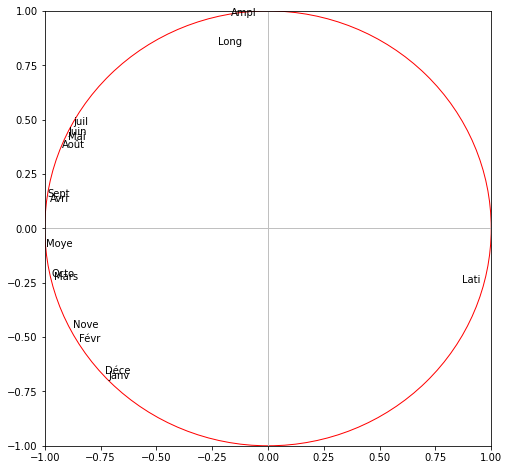

In [98]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#affichage des étiquettes (noms des variables)
for i in range(df.shape[1]):
 plt.annotate(df.columns[i],(coef_corr_lin[i,0],coef_corr_lin[i,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='red',fill=False)
axes.add_artist(cercle)

plt.show()

_On voit que les deux axes principaux favorisent clairement 2 types de variables. Avec le premier axe, ce sont les mois qui sont fortement corrélés, alors que pour le deuxième axe, il s'agit de `Long` et `Ampl`. Pourtant, `Lati` est davantage correlé avec le premier axe, mais du signe opposé aux variables représentant les mois. Du reste, Les varaibles qui sont fortement correlées avec le premier axe le sont plus ou moins avec le deuxième, et vice-versa._

### 7- Évaluation de la qualité de représentation des variables
## $Qlt(j,k) = \cos^2 = r^2(c, x^j)$

In [99]:
cos2_coef_corr_lin = coef_corr_lin ** 2

cos2_coef_corr_lin_axe_1 = list(map(lambda r: r[0], cos2_coef_corr_lin))
cos2_coef_corr_lin_axe_2 = list(map(lambda r: r[1], cos2_coef_corr_lin))

print(pd.DataFrame({'id':df.columns,'COS2_1': cos2_coef_corr_lin_axe_1,'COS2_2': cos2_coef_corr_lin_axe_2}).sort_values(by="COS2_1", ascending=False))
print("\n" + "-"*80 + "\n")
print(pd.DataFrame({'id':df.columns,'COS2_1': cos2_coef_corr_lin_axe_1,'COS2_2': cos2_coef_corr_lin_axe_2}).sort_values(by="COS2_2", ascending=False))

      id    COS2_1    COS2_2
14  Moye  0.991395  0.007500
8   Sept  0.973779  0.021634
3   Avri  0.954779  0.015395
9   Octo  0.937011  0.049529
2   Mars  0.916483  0.055331
7   Août  0.856724  0.136808
4    Mai  0.806694  0.167819
5   Juin  0.796414  0.185802
10  Nove  0.767121  0.208969
6   juil  0.765756  0.227541
12  Lati  0.758712  0.063608
1   Févr  0.718494  0.273507
11  Déce  0.533954  0.444135
0   Janv  0.512410  0.478654
13  Long  0.050195  0.716641
15  Ampl  0.028234  0.959873

--------------------------------------------------------------------------------

      id    COS2_1    COS2_2
15  Ampl  0.028234  0.959873
13  Long  0.050195  0.716641
0   Janv  0.512410  0.478654
11  Déce  0.533954  0.444135
1   Févr  0.718494  0.273507
6   juil  0.765756  0.227541
10  Nove  0.767121  0.208969
5   Juin  0.796414  0.185802
4    Mai  0.806694  0.167819
7   Août  0.856724  0.136808
12  Lati  0.758712  0.063608
2   Mars  0.916483  0.055331
9   Octo  0.937011  0.049529
8   Sept  0.973779

_Pour le premier axe, on peut voire que `Long` et `Ampl` sont plus ou moins bien représentées, alors que pour le deuxième axe, c'est le cas de toutes, sauf celles que je viens de mentionner._

### 8- Calcul de la contribution de chaque variable aux deux premiers axes factoriels
## $Ctr(j,k) = \frac {r^2(c, x^j)} {\lambda_k}$

In [101]:
ctr_var = (cos2_coef_corr_lin / eigen_values[:-1])

ctr_var_axe_1 = list(map(lambda r: r[0], ctr_var))
ctr_var_axe_2 = list(map(lambda r: r[1], ctr_var))

print(pd.DataFrame({'id':df.columns,'CTR_1': ctr_var_axe_1,'CTR_2': ctr_var_axe_2}).sort_values(by="CTR_1", ascending=False))
print("\n" + "-"*80 + "\n")
print(pd.DataFrame({'id':df.columns,'CTR_1': ctr_var_axe_1,'CTR_2': ctr_var_axe_2}).sort_values(by="CTR_2", ascending=False))

      id     CTR_1     CTR_2
14  Moye  0.087208  0.001869
8   Sept  0.085658  0.005391
3   Avri  0.083987  0.003837
9   Octo  0.082424  0.012343
2   Mars  0.080618  0.013789
7   Août  0.075362  0.034093
4    Mai  0.070961  0.041822
5   Juin  0.070057  0.046303
10  Nove  0.067480  0.052076
6   juil  0.067360  0.056705
12  Lati  0.066740  0.015852
1   Févr  0.063202  0.068160
11  Déce  0.046969  0.110681
0   Janv  0.045074  0.119283
13  Long  0.004415  0.178591
15  Ampl  0.002484  0.239206

--------------------------------------------------------------------------------

      id     CTR_1     CTR_2
15  Ampl  0.002484  0.239206
13  Long  0.004415  0.178591
0   Janv  0.045074  0.119283
11  Déce  0.046969  0.110681
1   Févr  0.063202  0.068160
6   juil  0.067360  0.056705
10  Nove  0.067480  0.052076
5   Juin  0.070057  0.046303
4    Mai  0.070961  0.041822
7   Août  0.075362  0.034093
12  Lati  0.066740  0.015852
2   Mars  0.080618  0.013789
9   Octo  0.082424  0.012343
8   Sept  0.085658

_Sur le premier axe, les variables ont environ toutes la même contribution sauf, encore une fois, `Long` et `Ampl`. Pour ce qui est du deuxième axe, c'est l'inverse._